In [387]:
import pandas as pd
import numpy as np

from scipy.stats import randint

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

#classifier models (to predict categorical feature)
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Data

In [395]:
train_data = pd.read_csv('data/prep_train_data.csv')
print(train_data.shape)
train_data.head(1)

(8594, 18)


,Passenger_trav_group,PassengerId_in_group,HomePlanet,CryoSleep,Deck_num,Room_num,Bord_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,First_name,Last_name,Transported
0,1,1,Earth,False,B,0,left,TRAPPIST-1e,39,False,0,0,0,0,0,Maham,Ofracculy,False


In [396]:
test_data = pd.read_csv('data/prep_test_data.csv')
print(test_data.shape)
test_data.head(1)

(4214, 17)


,Passenger_trav_group,PassengerId_in_group,HomePlanet,CryoSleep,Deck_num,Room_num,Bord_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,First_name,Last_name
0,13,1,Earth,True,G,3,right,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly,Carsoning


In [397]:
to_check_model = pd.read_csv('data/sample_submission.csv')
print(to_check_model.shape)
to_check_model.head(1)

(4277, 2)


,PassengerId,Transported
0,0013_01,False


# Supervised Prediction Models

In [398]:
# ENCODING

enc_train_data = train_data.copy()
enc_train_data[['HomePlanet','CryoSleep',
                'Deck_num','Bord_side',
                'Destination','VIP',
                'First_name','Last_name']] = enc_train_data[['HomePlanet','CryoSleep',
                                                             'Deck_num','Bord_side',
                                                             'Destination','VIP',
                                                             'First_name','Last_name']].apply(LabelEncoder().fit_transform)
# data preparing for classifier models
enc_train_data['RoomService'] = enc_train_data['RoomService'].apply(lambda x: 1 if int(x) > 0 else 0)
enc_train_data['FoodCourt'] = enc_train_data['FoodCourt'].apply(lambda x: 1 if int(x) > 0 else 0)
enc_train_data['ShoppingMall'] = enc_train_data['ShoppingMall'].apply(lambda x: 1 if int(x) > 0 else 0)
enc_train_data['Spa'] = enc_train_data['Spa'].apply(lambda x: 1 if int(x) > 0 else 0)
enc_train_data['VRDeck'] = enc_train_data['VRDeck'].apply(lambda x: 1 if int(x) > 0 else 0)


enc_test_data = test_data.copy()
enc_test_data[['HomePlanet','CryoSleep',
                'Deck_num','Bord_side',
                'Destination','VIP',
                'First_name','Last_name']] = enc_test_data[['HomePlanet','CryoSleep',
                                                             'Deck_num','Bord_side',
                                                             'Destination','VIP',
                                                             'First_name','Last_name']].apply(LabelEncoder().fit_transform)

# data preparing for classifier models
enc_test_data['RoomService'] = enc_test_data['RoomService'].apply(lambda x: 1 if int(x) > 0 else 0)
enc_test_data['FoodCourt'] = enc_test_data['FoodCourt'].apply(lambda x: 1 if int(x) > 0 else 0)
enc_test_data['ShoppingMall'] = enc_test_data['ShoppingMall'].apply(lambda x: 1 if int(x) > 0 else 0)
enc_test_data['Spa'] = enc_test_data['Spa'].apply(lambda x: 1 if int(x) > 0 else 0)
enc_test_data['VRDeck'] = enc_test_data['VRDeck'].apply(lambda x: 1 if int(x) > 0 else 0)

In [399]:
# feature selection researching

X = enc_train_data.drop(['Transported'], axis=1)
y = enc_train_data['Transported']
lasso = Lasso(alpha=1)
lasso.fit(X,y)
print(clf.intercept_)


coef_list = list(lasso.coef_)
corr_list = list(enc_train_data.corr()['Transported'].values[:-1])
features = list(enc_train_data.corr()['Transported'].index[:-1])

f_selection = pd.DataFrame(columns=['feature', 'correlation_coef', 'predicted_lasso_coef'])
f_selection['feature'] = features
f_selection['correlation_coef'] = corr_list
f_selection['predicted_lasso_coef'] = coef_list

f_selection

#Lasso - not a better model

0.5655266224785385


,feature,correlation_coef,predicted_lasso_coef
0,Passenger_trav_group,0.021298,0.000017
1,PassengerId_in_group,0.066190,0.000000
2,HomePlanet,0.020374,0.000000
3,CryoSleep,0.460333,0.000000
4,Deck_num,-0.116517,-0.000000
5,Room_num,-0.045936,-0.000100
6,Bord_side,0.103711,0.000000
7,Destination,-0.108414,-0.000000
8,Age,-0.074940,-0.000000
9,VIP,-0.037690,-0.000000


In [400]:
#drop uninfluenced features
X = enc_train_data.drop(['Passenger_trav_group','PassengerId_in_group','HomePlanet','Room_num','Age','VIP',
                         'First_name','Last_name','Transported'], axis=1)

X.head(3)

,CryoSleep,Deck_num,Bord_side,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,0,2,0,0,0,0,0
1,0,5,1,2,1,1,1,1,1
2,0,0,1,2,1,1,0,1,1


<Axes: >

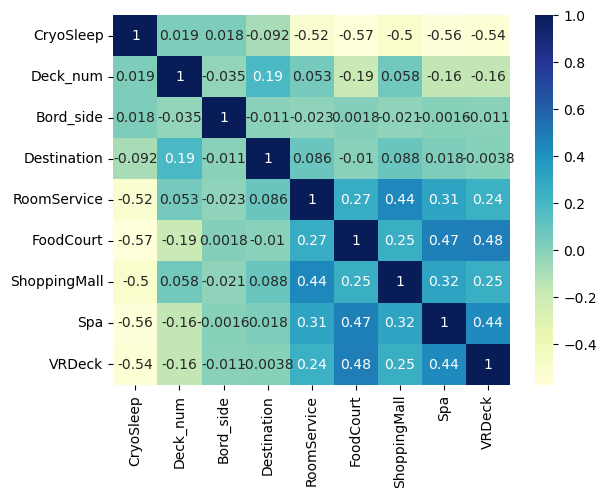

In [401]:
# multicollinearity test
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

In [402]:
# multicollinearity problem solve (passenger's service datas)

X['service'] = X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['Spa'] + X['VRDeck']
X['service'] = X['service'].apply(lambda x: 1 if x > 0 else 0)
X = X.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1)

X.head(3)

,CryoSleep,Deck_num,Bord_side,Destination,service
0,0,1,0,2,0
1,0,5,1,2,1
2,0,0,1,2,1


In [403]:
# spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

First model assessment

In [404]:
models_list = [LogisticRegression,
               DecisionTreeClassifier, RandomForestClassifier,
               GradientBoostingClassifier, KNeighborsClassifier, SVC]
model_names_list = ['LogisticRegression',
                    'DecisionTreeClassifier', 'RandomForestClassifier',
                    'GradientBoostingClassifier', 'KNeighborsClassifier', 'SVC']

def prediction_model(sklearn_models=models_list, models_names=model_names_list):    
    c=0
    for model in sklearn_models:
        # model
        model = model()

        # model fit & predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(models_names[c])
        
        # accuracy test
        accuracy = accuracy_score(y_test, y_pred)
        print('Average model accuracy: ', round(accuracy*100,2), '%')
        print()
        c+=1

In [405]:
prediction_model()

LogisticRegression
Average model accuracy:  73.41 %

DecisionTreeClassifier
Average model accuracy:  73.76 %

RandomForestClassifier
Average model accuracy:  73.88 %

GradientBoostingClassifier
Average model accuracy:  74.05 %

KNeighborsClassifier
Average model accuracy:  67.48 %

SVC
Average model accuracy:  73.53 %



Choosing better models and try to level up accuracy

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [407]:
# LogisticRegression

lr = LogisticRegression(random_state=20)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy*100,2),'%')

73.94 %


In [408]:
# DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=7, random_state=20)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy*100,2),'%')

74.99 %


In [409]:
# RandomForestClassifier

param_dist = {'n_estimators': randint(5,500),
              'max_depth': randint(1,20)}

rfc = RandomForestClassifier()
rand_search = RandomizedSearchCV(rfc, param_distributions = param_dist, n_iter=5, cv=5)

# finding best model parameters
rand_search.fit(X_train, y_train)
rand_search.best_estimator_
best_param = rand_search.best_params_
print(best_param)

# best params to model
rfc = RandomForestClassifier(n_estimators=best_param['n_estimators'], max_depth=best_param['max_depth'], random_state=20)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy*100,2),'%')

{'max_depth': 16, 'n_estimators': 387}
74.81 %


In [410]:
# GradientBoostingClassifier (without finding best params automatically)

gbc = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=20)
gbc.fit(X_train_prep, y_train)
y_pred = gbc.predict(X_test_prep)
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy*100,2),'%')

74.64 %


In [411]:
# SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy*100,2),'%')

73.76 %


Let's to apply model

In [412]:
# better model - GradientBoostingClassifier

X = enc_test_data.drop(['Passenger_trav_group','PassengerId_in_group','HomePlanet','Room_num','Age','VIP',
                         'First_name','Last_name'], axis=1)
X['service'] = X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['Spa'] + X['VRDeck']
X['service'] = X['service'].apply(lambda x: 1 if x > 0 else 0)
X = X.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1)

y_pred = gbc.predict(X)

test_data['Transported'] = y_pred

# to split train datas
to_check_model[['Passenger_trav_group', 'PassengerId_in_group']] = to_check_model['PassengerId'].str.split('_0', 
                                                                                                           n=1, 
                                                                                                           expand=True)
to_check_model['Passenger_trav_group'] = to_check_model['Passenger_trav_group'].apply(lambda x: int(x))
to_check_model['PassengerId_in_group'] = to_check_model['PassengerId_in_group'].apply(lambda x: int(x))

# merge 2 sets to check accuracy
new_test_data = pd.merge(test_data, to_check_model,  how='left', 
                         left_on=['Passenger_trav_group', 'PassengerId_in_group'], 
                         right_on = ['Passenger_trav_group', 'PassengerId_in_group'])

new_test_data = new_test_data.rename(columns={'Transported_x':'Transported_model',
                                              'Transported_y':'Transported_true'})
new_test_data = new_test_data.drop(['PassengerId'], axis=1)

# tests
print(classification_report(new_test_data['Transported_true'], 
                            new_test_data['Transported_model'], 
                            target_names=['True', 'False']))

              precision    recall  f1-score   support

        True       1.00      0.71      0.83      4214
       False       0.00      0.00      0.00         0

    accuracy                           0.71      4214
   macro avg       0.50      0.36      0.42      4214
weighted avg       1.00      0.71      0.83      4214



D:\Yuliya\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
D:\Yuliya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Yuliya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Yuliya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter t

I'm choose GradientBoostingClassifier, 
because DecisionTreeClassifier has a retraining problem on test set and RandomForestClassifier accuracy was just 57%

# Losted passengers

In [426]:
losted_passengers = new_test_data[new_test_data['Transported_model'] == True]

In [427]:
losted_passengers.to_csv('data/losted_passengers.csv', index=False)